# 딥러닝 만들기

1. 데이터 분석
2. 데이터 불러오기
3. 모델 만들기
4. 훈련 루프 짜기
5. 테스트 만들기

CSV 파일 : pandas
이미지파일 : pillow

In [1]:
import time
import pandas as pd
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader

In [3]:
from torchvision import transforms, utils

In [4]:
data_path = "../input/data/train/"
df = pd.read_csv(data_path + "datapath_with_label.csv")
df.head()

,file,label
0,data/train/images/000001_female_Asian_45/mask2...,4
1,data/train/images/000001_female_Asian_45/mask1...,4
2,data/train/images/000001_female_Asian_45/mask5...,4
3,data/train/images/000001_female_Asian_45/norma...,16
4,data/train/images/000001_female_Asian_45/mask3...,4


In [5]:
df["file"] = df["file"].map(lambda x : "../input/" + x)
df.head()

,file,label
0,../input/data/train/images/000001_female_Asian...,4
1,../input/data/train/images/000001_female_Asian...,4
2,../input/data/train/images/000001_female_Asian...,4
3,../input/data/train/images/000001_female_Asian...,16
4,../input/data/train/images/000001_female_Asian...,4


In [6]:
df["file"][0]

'../input/data/train/images/000001_female_Asian_45/mask2.jpg'

In [7]:
'''
image_file_name = glob.glob(
    data_path + "images/" + df["path"][0] + "/*"
)
image_file_name[:10]
'''

'\nimage_file_name = glob.glob(\n    data_path + "images/" + df["path"][0] + "/*"\n)\nimage_file_name[:10]\n'

(512, 384, 3)


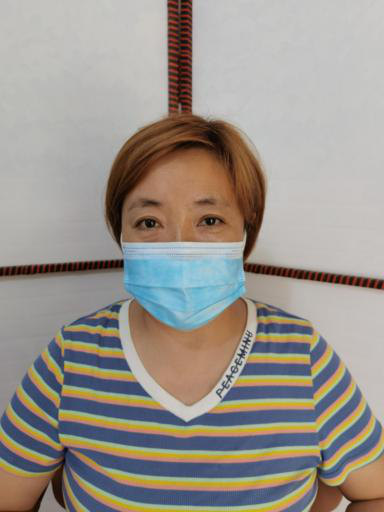

In [8]:
smaple_im = Image.open(df["file"][0])
print(np.array(smaple_im).shape)
smaple_im

In [9]:
'''
np.array(smaple_im).shape
# 크다
'''

'\nnp.array(smaple_im).shape\n# 크다\n'

## 딥러닝에 넣을때

X : 입력의 형태  
-> 사진 인데 크다  
-> 자르고 해상도를 낮추는 작업을 하면 좋겠다.  
-> Crop(X), Resize   

y : 우리가 맞춰야하는 정답의 형태  
-> 18개 레이블  
-> (마스크 착용 여부 x 3) * (성별 x 2) * (나이대 x 3)  
-> 판다스 csv 를 이용해서 추출 가능 (X)  

이런 X, y를 매칭 시켜서 아웃풋으로 내보내는 데이터 로더

In [10]:
class ImageDataset(Dataset):
    def __init__(self, data_path, pre_transforms, transforms):
        df = pd.read_csv(
            data_path + "datapath_with_label.csv"
        )
        
        df["file"] = df["file"].map(lambda x : "../input/" + x)
        self.X = []
        for X in df["file"]:
            self.X.append(pre_transforms(Image.open(X)))
        self.y = df["label"]
        
        self.transforms = transforms
    def __len__(self):
        len_dataset = len(self.X)
        return len_dataset
    
    def __getitem__(self, idx):
        X, y = self.transforms(self.X[idx]), self.y[idx]
        
        return X, torch.tensor(y)

In [11]:
print(512//4,384//4)

128 96


In [13]:
tic = time.time()
dataset = ImageDataset(
    data_path = "../input/data/train/",
    pre_transforms = transforms.Compose([
        transforms.Resize((512//3,384//3)),
        transforms.CenterCrop((64, 64)),
    ]),
    transforms = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()
    ])
)
print(time.time() - tic)

81.14183163642883


torch.Size([3, 64, 64])


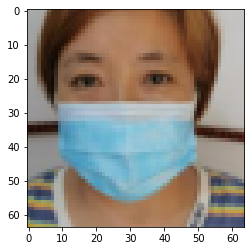

In [13]:
print(dataset[0][0].shape)
plt.imshow(dataset[0][0].permute(1,2,0))
plt.show()

In [14]:
dataloader = DataLoader(
    dataset,
    batch_size  = 100,
    shuffle     = True,
    sampler     = None,
    num_workers = 1
)

In [15]:
device = torch.device("cuda:0")
tictoc, iteration = 0, 10
for _ in range(iteration):
    tic = time.time()
    for X, y in iter(dataloader):
        single_batch = torch.nn.Conv2d(3,3,(3,3),device = device)(X.to(device))
    tictoc += time.time() - tic
print(tictoc / iteration)

6.932633423805237


In [16]:
single_batch = next(iter(dataloader))
print(single_batch[0].shape)
print(single_batch[1])

torch.Size([100, 3, 64, 64])
tensor([12,  7,  3,  4,  4, 12,  3,  0,  1, 10,  0,  4,  3, 12,  3,  4,  4,  3,
         4,  3,  4,  3,  0,  0,  3,  1,  4,  4,  0, 12,  4,  0,  3,  3,  2,  3,
         1,  0,  9,  4,  1,  7,  2,  1,  4,  4,  1,  4, 10,  0, 16,  7, 12,  4,
         3,  3,  8,  1,  4,  5,  0,  5,  5,  5,  4,  2,  5, 12,  5,  4, 16,  5,
         7,  1, 12,  4,  1,  5,  4,  0,  3, 15,  4,  4,  6,  3,  2,  4,  6,  3,
         4,  0,  0,  3,  2,  6,  4,  0, 12,  6])


In [1]:
from DataLoader import ImageDataset

In [4]:
from torchvision import transforms, utils
import matplotlib.pyplot as plt

In [3]:
dataset = ImageDataset(
    data_path = "../input/data/train/",
    transforms = transforms.Compose([
        transforms.CenterCrop((300,200)),
        transforms.Resize((128,128)),
        transforms.ToTensor()
    ])
)

torch.Size([3, 128, 128])


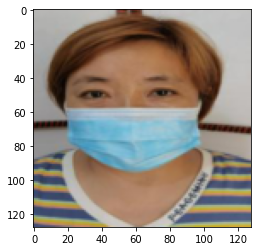

In [5]:
print(dataset[0][0].shape)
plt.imshow(dataset[0][0].permute(1,2,0))
plt.show()

In [16]:
bit = ( 512 * 384 * 3 * 8 )
print('byte : ', bit/8)
print('KB : ', bit/8/1024)
print('MB : ', bit/8/1024/1024)
print('GB : ', bit/8/1024/1024/1024)

byte :  589824.0
KB :  576.0
MB :  0.5625
GB :  0.00054931640625
